In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mplfinance as mpf

In [3]:
df = pd.read_csv('asian_paints2.csv')

In [4]:
df.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,26-Sep-2025,EQ,"2,397.50","2,400.00","2,339.00","2,404.00","2,342.00","2,342.80","2,359.94","3,358.00","2,124.75","10,89,446","2,57,10,28,693.60","88,638"
1,25-Sep-2025,EQ,"2,458.50","2,462.70","2,388.00","2,457.20","2,404.00","2,404.00","2,413.29","3,358.00","2,124.75","15,18,215","3,66,38,92,010.10","81,168"
2,24-Sep-2025,EQ,"2,446.00","2,475.00","2,443.20","2,446.90","2,458.50","2,457.20","2,461.22","3,358.00","2,124.75","6,37,749","1,56,96,39,539.80","54,569"
3,23-Sep-2025,EQ,"2,472.10","2,483.80","2,428.00","2,482.70","2,450.00","2,446.90","2,449.86","3,358.00","2,124.75","13,32,111","3,26,34,85,069.30","63,604"
4,22-Sep-2025,EQ,"2,494.10","2,503.00","2,474.10","2,481.70","2,479.90","2,482.70","2,488.32","3,358.00","2,124.75","8,72,806","2,17,18,23,851.00","47,534"


In [17]:
df.columns = df.columns.str.strip().str.replace(',',' ')

In [18]:
print(df.dtypes)

series           object
OPEN            float64
HIGH            float64
LOW             float64
PREV. CLOSE      object
ltp              object
close           float64
vwap             object
52W H            object
52W L            object
VOLUME           object
VALUE            object
No of trades     object
dtype: object


In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df = df.sort_values('Date')

In [11]:
df.set_index('Date',inplace = True)
df.head()

,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
Date,,,,,,,,,,,,,
2025-08-28,EQ,"2,465.00","2,528.00","2,465.00","2,481.40","2,490.00","2,489.00","2,505.93","3,394.90","2,124.75","14,85,769","3,72,32,34,769.70","1,05,181"
2025-08-29,EQ,"2,491.00","2,531.60","2,490.00","2,489.00","2,520.00","2,518.60","2,513.22","3,394.90","2,124.75","17,98,653","4,52,04,02,451.20","1,05,469"
2025-09-01,EQ,"2,518.00","2,577.80","2,515.10","2,518.60","2,570.00","2,570.20","2,559.95","3,394.90","2,124.75","13,14,833","3,36,59,06,195.70","62,406"
2025-09-02,EQ,"2,569.00","2,571.90","2,531.00","2,570.20","2,538.00","2,540.00","2,549.56","3,394.90","2,124.75","10,24,054","2,61,08,85,776.30","85,903"
2025-09-03,EQ,"2,530.00","2,565.10","2,527.30","2,540.00","2,560.00","2,553.90","2,550.67","3,394.90","2,124.75","9,25,847","2,36,15,33,560.30","56,343"


In [12]:
#List of columns to convert '
columns_to_convert = ['OPEN','HIGH','LOW','close']

In [21]:
for col in columns_to_convert:
    df[col] = df[col].astype(float)
    

In [22]:
print(df.dtypes)

series           object
OPEN            float64
HIGH            float64
LOW             float64
PREV. CLOSE      object
ltp              object
close           float64
vwap             object
52W H            object
52W L            object
VOLUME           object
VALUE            object
No of trades     object
dtype: object


In [31]:
df_columns_to_convert = df[['OPEN','HIGH','LOW','close']]
print(df_columns_to_convert)

              OPEN    HIGH     LOW   close
Date                                      
2025-08-28  2465.0  2528.0  2465.0  2489.0
2025-08-29  2491.0  2531.6  2490.0  2518.6
2025-09-01  2518.0  2577.8  2515.1  2570.2
2025-09-02  2569.0  2571.9  2531.0  2540.0
2025-09-03  2530.0  2565.1  2527.3  2553.9
2025-09-04  2553.9  2583.0  2553.0  2568.6
2025-09-05  2565.0  2602.0  2565.0  2579.9
2025-09-08  2579.9  2589.6  2526.4  2530.8
2025-09-09  2540.0  2551.6  2524.8  2537.3
2025-09-10  2537.3  2555.0  2525.1  2543.3
2025-09-11  2541.0  2559.5  2535.7  2555.9
2025-09-12  2560.0  2568.3  2537.2  2546.3
2025-09-15  2535.1  2543.5  2498.0  2502.6
2025-09-16  2495.0  2509.9  2474.5  2480.9
2025-09-17  2482.0  2496.9  2480.8  2493.6
2025-09-18  2497.9  2506.2  2469.3  2478.7
2025-09-19  2475.0  2509.5  2468.5  2481.7
2025-09-22  2494.1  2503.0  2474.1  2482.7
2025-09-23  2472.1  2483.8  2428.0  2446.9
2025-09-24  2446.0  2475.0  2443.2  2457.2
2025-09-25  2458.5  2462.7  2388.0  2404.0
2025-09-26 

# Creating the candlestick chart


In [56]:
candlestick_df = df[['OPEN','HIGH','LOW','close']].copy()
print(candlestick_df)

              OPEN    HIGH     LOW   close
Date                                      
2025-08-28  2465.0  2528.0  2465.0  2489.0
2025-08-29  2491.0  2531.6  2490.0  2518.6
2025-09-01  2518.0  2577.8  2515.1  2570.2
2025-09-02  2569.0  2571.9  2531.0  2540.0
2025-09-03  2530.0  2565.1  2527.3  2553.9
2025-09-04  2553.9  2583.0  2553.0  2568.6
2025-09-05  2565.0  2602.0  2565.0  2579.9
2025-09-08  2579.9  2589.6  2526.4  2530.8
2025-09-09  2540.0  2551.6  2524.8  2537.3
2025-09-10  2537.3  2555.0  2525.1  2543.3
2025-09-11  2541.0  2559.5  2535.7  2555.9
2025-09-12  2560.0  2568.3  2537.2  2546.3
2025-09-15  2535.1  2543.5  2498.0  2502.6
2025-09-16  2495.0  2509.9  2474.5  2480.9
2025-09-17  2482.0  2496.9  2480.8  2493.6
2025-09-18  2497.9  2506.2  2469.3  2478.7
2025-09-19  2475.0  2509.5  2468.5  2481.7
2025-09-22  2494.1  2503.0  2474.1  2482.7
2025-09-23  2472.1  2483.8  2428.0  2446.9
2025-09-24  2446.0  2475.0  2443.2  2457.2
2025-09-25  2458.5  2462.7  2388.0  2404.0
2025-09-26 

In [59]:
# Strip spaces and lowercase first
candlestick_df.columns = candlestick_df.columns.str.strip().str.lower()

# Then rename to proper case for mplfinance
candlestick_df = candlestick_df.rename(columns={
    'open': 'Open',
    'high': 'High',
    'low': 'Low',
    'close': 'Close',
    'volume': 'Volume'
})

# Convert index to datetime (important!)
candlestick_df.index = pd.to_datetime(candlestick_df.index)


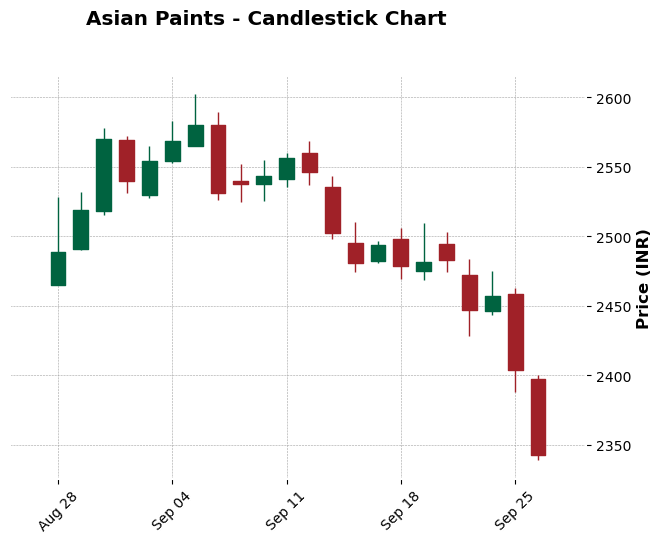

In [60]:
mpf.plot(
    candlestick_df,
    type='candle',
    style='charles',
    title='Asian Paints - Candlestick Chart',
    ylabel='Price (INR)',
    volume=False
)


# Simple moving averages

In [62]:
df['SMA_20']= df['close'].rolling(window= 20).mean()

In [63]:
df['SMA_50']= df['close'].rolling(window = 50).mean()

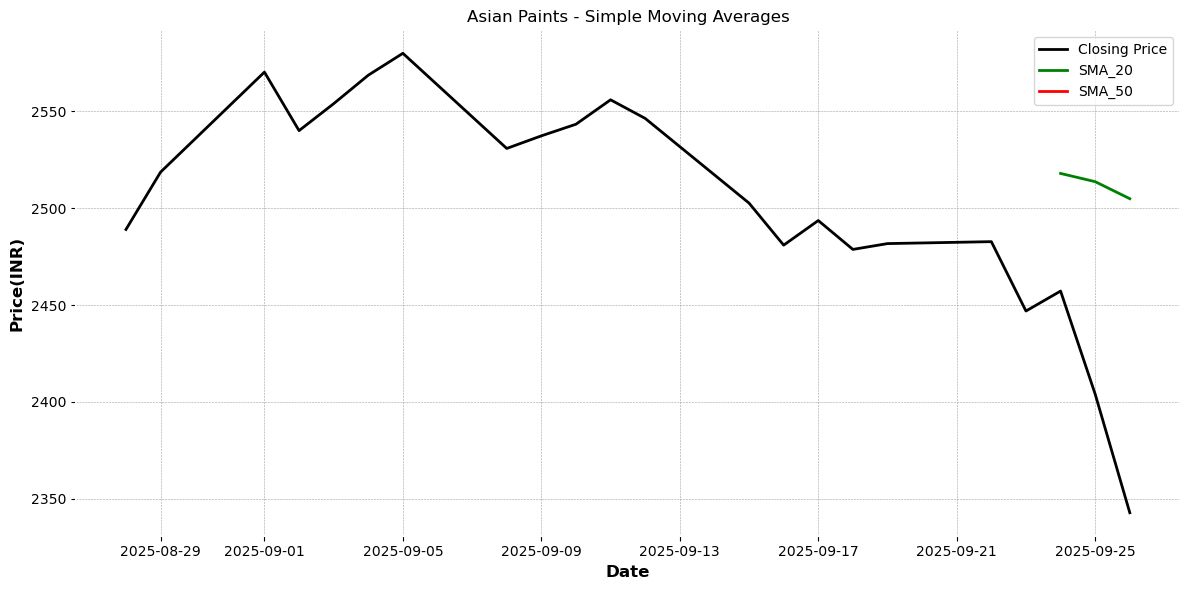

In [65]:
plt.figure(figsize= (12,6))
plt.plot(df['close'], label ='Closing Price',color= 'black')
plt.plot(df['SMA_20'], label ='SMA_20', color = 'green')
plt.plot(df['SMA_50'], label = 'SMA_50', color = 'red')
plt.title('Asian Paints - Simple Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price(INR)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Relative Strenght Index(RSI)

In [72]:
delta = df['close'].diff()
gain = delta.where(delta>0, 0)
loss = -delta.where(delta<0,0)
avg_gain = gain.rolling(window = 14).mean()
avg_loss = loss.rolling(window= 14).mean()

rs= avg_gain / avg_loss
df['RSI']= 100- (100/(1 + rs))

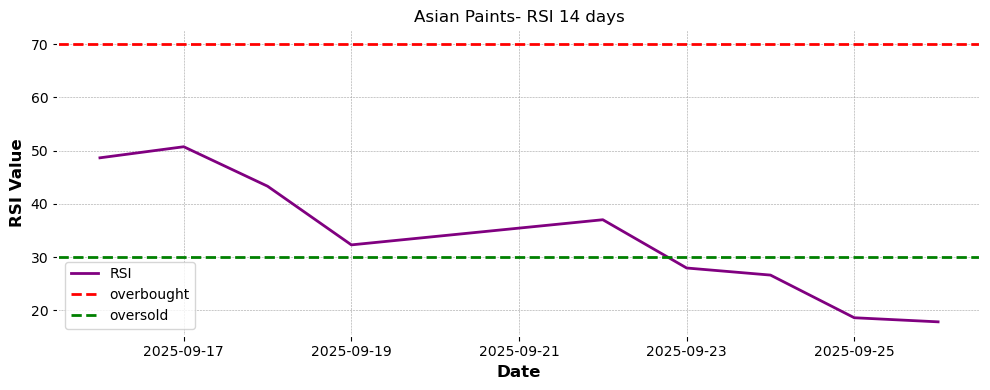

In [73]:
plt.figure(figsize = (10,4))
plt.plot(df['RSI'], label = 'RSI', color ='purple')
plt.axhline(70, linestyle = '--', color = 'red', label = 'overbought')
plt.axhline(30, linestyle = '--', color ='green', label = 'oversold')
plt.title('Asian Paints- RSI 14 days')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.legend()
plt.tight_layout()
plt.show()

# Moving Average Convergence Divergence (MACD)

In [74]:
ema_12 = df['close'].ewm(span = 12, adjust = False).mean()
ema_26 = df['close'].ewm(span = 26, adjust = False).mean()

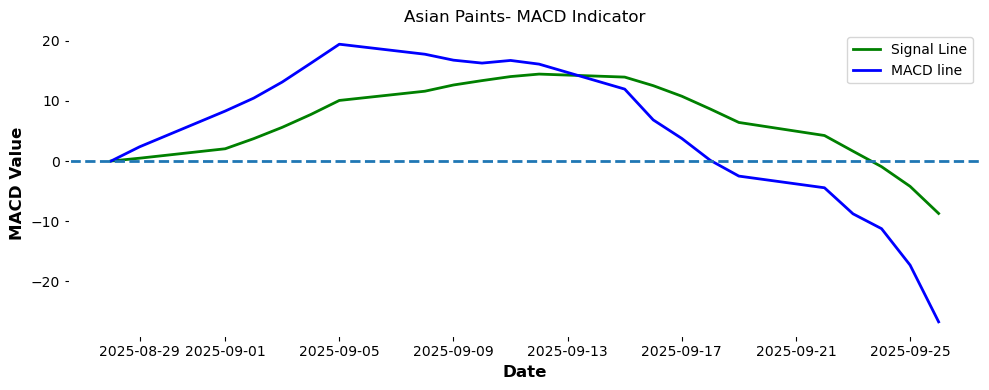

In [82]:
df['MACD']= ema_12- ema_26
df['Signal_line']= df['MACD'].ewm(span=9, adjust = False).mean()
plt.figure(figsize =(10,4))
plt.plot(df['Signal_line'], label= 'Signal Line', color='green')
plt.plot(df['MACD'], label = 'MACD line',color ='blue')
plt.axhline(0, linestyle ='--')
plt.title('Asian Paints- MACD Indicator')
plt.xlabel('Date')
plt.ylabel('MACD Value')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

# Bollinger bands

In [85]:
df['Middle_band'] = df['close'].rolling(window = 20).mean()
std_dev = df['close'].rolling(window= 20).std()
df['Upper_Band']= df['Middle_band'] + (2* std_dev)
df['Lower_band'] = df['Middle_band']-(2*std_dev)


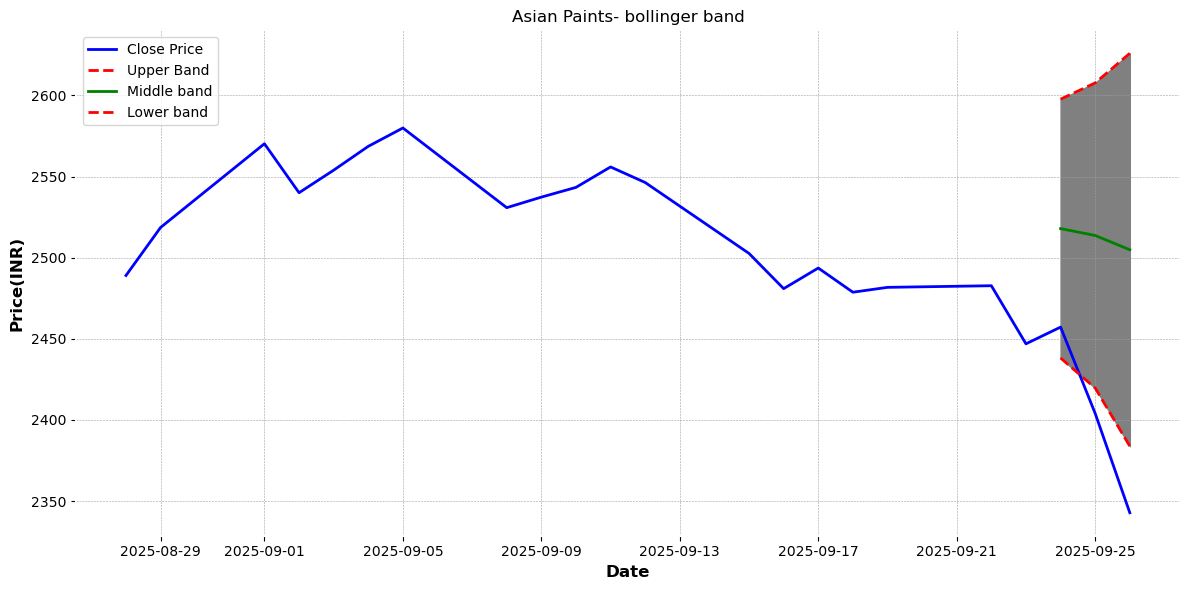

In [87]:
plt.figure(figsize =(12,6))
plt.plot(df['close'], label = 'Close Price',color ='blue')
plt.plot(df['Upper_Band'], label = 'Upper Band', color= 'red', linestyle = '--')
plt.plot (df['Middle_band'], label = 'Middle band', color ='green')
plt.plot(df['Lower_band'], label= 'Lower band', color ='red', linestyle = '--')
plt.fill_between( df.index, df['Upper_Band'], df['Lower_band'], color ='gray')
plt.title('Asian Paints- bollinger band')
plt.xlabel('Date')
plt.ylabel('Price(INR)')
plt.legend()
plt.tight_layout()
plt.show()
